```{contents}
:local:
:depth: 2
```

# Linear Algebra

Linear algebra is required for all engineers, but the conceptual aspects are often not taught or have been forgotten. This section provides a refresher on key computational and conceptual tools in matrix algebra and vector spaces.

## Learning Objectives

By the end of this section, you should be able to:

- Construct and interpret matrix-vector products using polynomial basis sets  
- Compute vector norms and inner products; identify orthogonal relationships  
- Solve systems of equations using matrix factorizations and interpret matrix rank  
- Compare eigendecomposition and SVD; apply both to analyze matrix structure  
- Evaluate matrix conditioning using eigenvalues and singular values

## Matrix-vector multiplication

First, some definitions:

* Dot product or "inner product":

$\vec{a} \cdot{} \vec{b} = \sum_i a_i b_i$

* Matrix/vector multiplication:

$\bar{\bar{A}} \vec{x} = \sum_j A_{ij} x_j = b_i$

* Matrix/matrix multiplication:

$\bar{\bar{A}} \bar{\bar{B}} = \sum_j A_{ij} B_{jk}$

Note that we use "summation" or "index" notation in these definitions. It may look scary or difficult at first, but it can be very useful for programming. The sums turn into for loops, and the indices map directly from the notation into the code.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # standard and recommended import convention
import numpy as np
plt.style.use('../settings/plot_style.mplstyle')

```{note}
These standard import statements will appear at the beginning of most notes to set up the environment.
```

---

### Demonstration: Matrix-vector multiplication with nested loops

This example uses Python `for` loops to multiply a $2\times2$ matrix with a 2-element vector.

In [2]:
A  = np.array([[0, 1], [2, 3]])
B = np.array([0, 1])

for i in range(A.shape[0]):
    sum = 0
    for j in range(A.shape[1]):
        sum += A[i][j] * B[j]
    print(sum)

1
3


This matches what we expect from manual matrix multiplication:
- First row: $0 \cdot 0 + 1 \cdot 1 = 1$
- Second row: $2 \cdot 0 + 3 \cdot 1 = 3$

---

We will explore matrix-vector multiplication conceptually by constructing a dataset from the "Vandermonde" matrix of polynomials and a weight vector, $\vec{w}$ to construct a dataset of the form:

$y_i = w_0 + w_1 x_i + w_2 x_i^2$

It may be useful to write this in summation notation and compare it to the matrix-vector multiplication definition:

$y_i = \sum_{j=0}^2 w_j x_i^{\: j}$

First, we can use `numpy` to create a vector $x_i$:

In [3]:
xi = np.linspace(0,10,11)
xi

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Now, we can create a new vector $z_i = x_i^2$:

In [4]:
zi = xi**2
zi

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

Next, let's create a vector that contains each of the weight parameters, $w_j$:

In [5]:
wj = [1.5, 0.8, -0.2]

We can now construct $y_i$ manually:

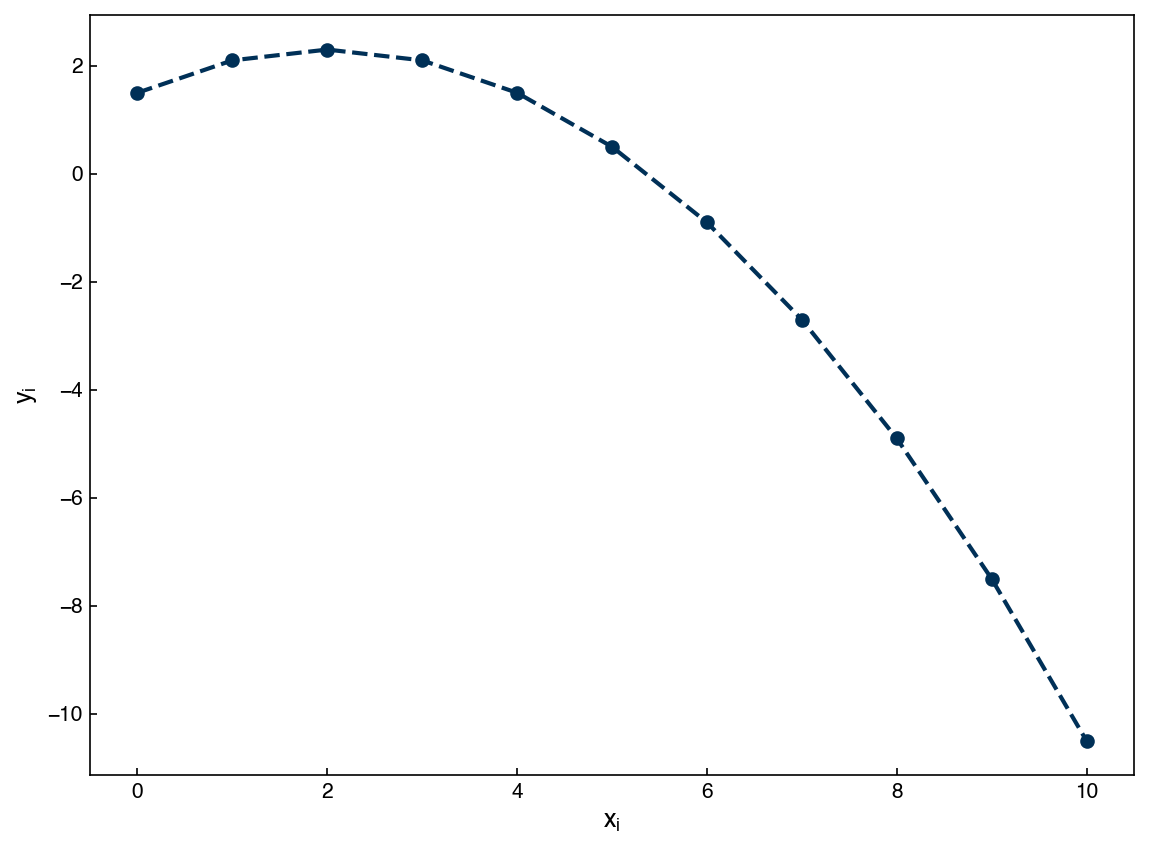

In [6]:
yi = wj[0] + wj[1]*xi + wj[2]*zi

fig, ax = plt.subplots()
ax.plot(xi, yi, '--o')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$y_i$');

---

This works, but we can create the same dataset using a **Vandermonde matrix**, which is a matrix of polynomials defined as:

$X_{ij} = x_i^{\: j}$

In other words, each column of the matrix consists of a different polynomial.

We can construct this matrix using `numpy`. First, we need to turn $x_i$ into a column vector:

In [7]:
print("x_i vector shape: {}".format(xi.shape))
xi_col = xi.reshape(-1, 1)  # equivalent to xi.reshape((xi.shape[0], 1))
print("x_i column shape: {}".format(xi_col.shape))

x_i vector shape: (11,)
x_i column shape: (11, 1)


Now, we can "stack" these vectors together to create the Vandermonde matrix:

In [8]:
xi = xi_col
X_vdm = np.hstack((xi**0, xi**1, xi**2))
X_vdm

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Next we can directly create $y_i$ using matrix-vector multiplication based on the definition of matrix-vector multiplication:

$\bar{\bar{X}}\vec{w} = \sum_j X_{ij}w_j = w_0 + w_1 x_i + w_2 x_i^2$

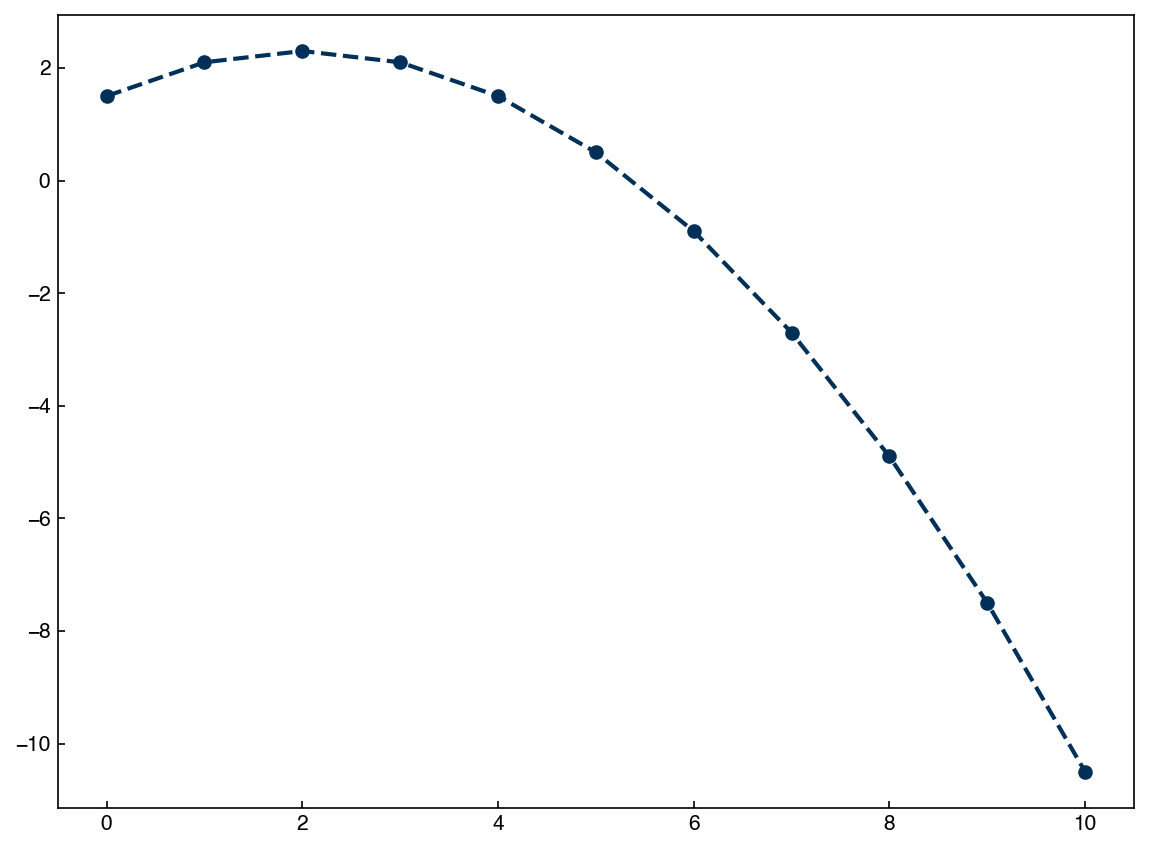

In [9]:
yi_vdm = X_vdm @ wj

fig, ax = plt.subplots()
ax.plot(xi, yi_vdm, '--o');

We can verify that both approaches yield the same $y_i$:

In [10]:
yi == yi_vdm

array([ True,  True,  True, False,  True, False, False,  True,  True,
       False, False])

Since numerical methods often introduce small round-off error, it's better to use:

In [11]:
np.isclose(yi, yi_vdm)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

```{note}
The `.all()` method is commonly used with `np.isclose()` to check if *all* elements of an array are `True`. This is useful when confirming whether two arrays are element-wise equal to within a small tolerance.

```python
M = np.isclose(yi, yi_vdm)
M.all()  # True if every element in M is True
```

---

### Demonstration: Create a 2nd-order Vandermonde matrix

This example shows how to build a Vandermonde matrix using `hstack`.

In [12]:
x = np.linspace(0, 5, 6).reshape(-1, 1) #a slightly fancy one-liner to make a column vector
vdm = np.hstack((x**0, x, x**2))  
print(vdm)

[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


---

~~~{admonition} Exercise
:class: tip

Write a function `matmul_loops(A, B)` that multiplies two matrices using nested `for` loops. Then compare the result with the built-in matrix multiplication using `A @ B`.

Use the following test input:

```python
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
```

- Verify that both results are the same (use `np.allclose`)
- Print the result of your function and the built-in multiplication
~~~


## Norms, inner products, and orthogonality

Vectors can be described by various "norms" that capture their size and distance. The most common is the $L_2$ norm, also called the **Euclidean norm**, defined as:

$$
||\vec{x}||_2 = \sqrt{\sum_i x_i^2}
$$

This can also be computed using the inner product of a vector with itself:

$$
||\vec{x}||_2 = \sqrt{\vec{x}^T \vec{x}}
$$

A vector is called "normal" if its norm is 1. We can always **normalize** a vector by dividing it by its norm:

In [13]:
col_0 = X_vdm[:,0]
norm_col_0 = np.linalg.norm(col_0,2)
col_0_normed = col_0/norm_col_0
print('Column norm: {}'.format(norm_col_0))
print('Normed column norm: {}'.format(np.linalg.norm(col_0_normed,2)))

Column norm: 3.3166247903554
Normed column norm: 1.0


We will also occasionally use the $L_1$ norm, defined as:

$$
||\vec{x}||_1 = \sum_i |x_i|
$$

These norms, and others, are discussed in detail in [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/notes/16_Linear_algebra/16_5_Norms.ipynb) and Lecture 3 of Trefethen & Bau.

---

It is also useful to remember that the inner product between two different vectors equals the product of their magnitudes and the cosine of the angle between them:

$$
\vec{x}^T\vec{y} = ||\vec{x}||_2 ||\vec{y}||_2 \cos(\theta)
$$

This allows us to compute the angle between two **normalized** vectors:

In [14]:
col_1 = X_vdm[:,1]
norm_col_1 = np.linalg.norm(col_1,2)
col_1_normed = col_1/norm_col_1

cos_theta = np.dot(col_1_normed, col_0_normed)
theta = np.degrees(np.arccos(cos_theta))
theta

np.float64(32.31153323742384)

Vectors are defined as **orthogonal** if their inner product is zero. We can check this:

In [15]:
theta = np.degrees(np.arccos(0))
theta

np.float64(90.0)

This shows that orthogonal vectors are separated by 90 degrees — or have no projection onto each other.

---

One key concept that comes in handy is the ability to find the orthogonal components of an arbitrary set of vectors. We can do this by subtracting off the projection of one vector onto another:

In [16]:
col_1_ortho = col_1_normed - np.dot(col_0_normed, col_1_normed)*col_0_normed
np.dot(col_1_ortho, col_0_normed)

np.float64(-1.1102230246251565e-16)

While this isn't exactly zero, it is very close:

In [17]:
np.isclose(np.dot(col_1_ortho, col_0_normed), 0)

np.True_

There is a discussion and proof of why this works in Lecture 2 of Trefethen & Bau.

```{note}
These vectors don’t appear to be at “right angles” in the plot — and that’s okay!  
Remember that they live in **11-dimensional space**, so our visual intuition does not apply directly.
```

Let's compare the original normalized vectors and their orthogonal counterparts:

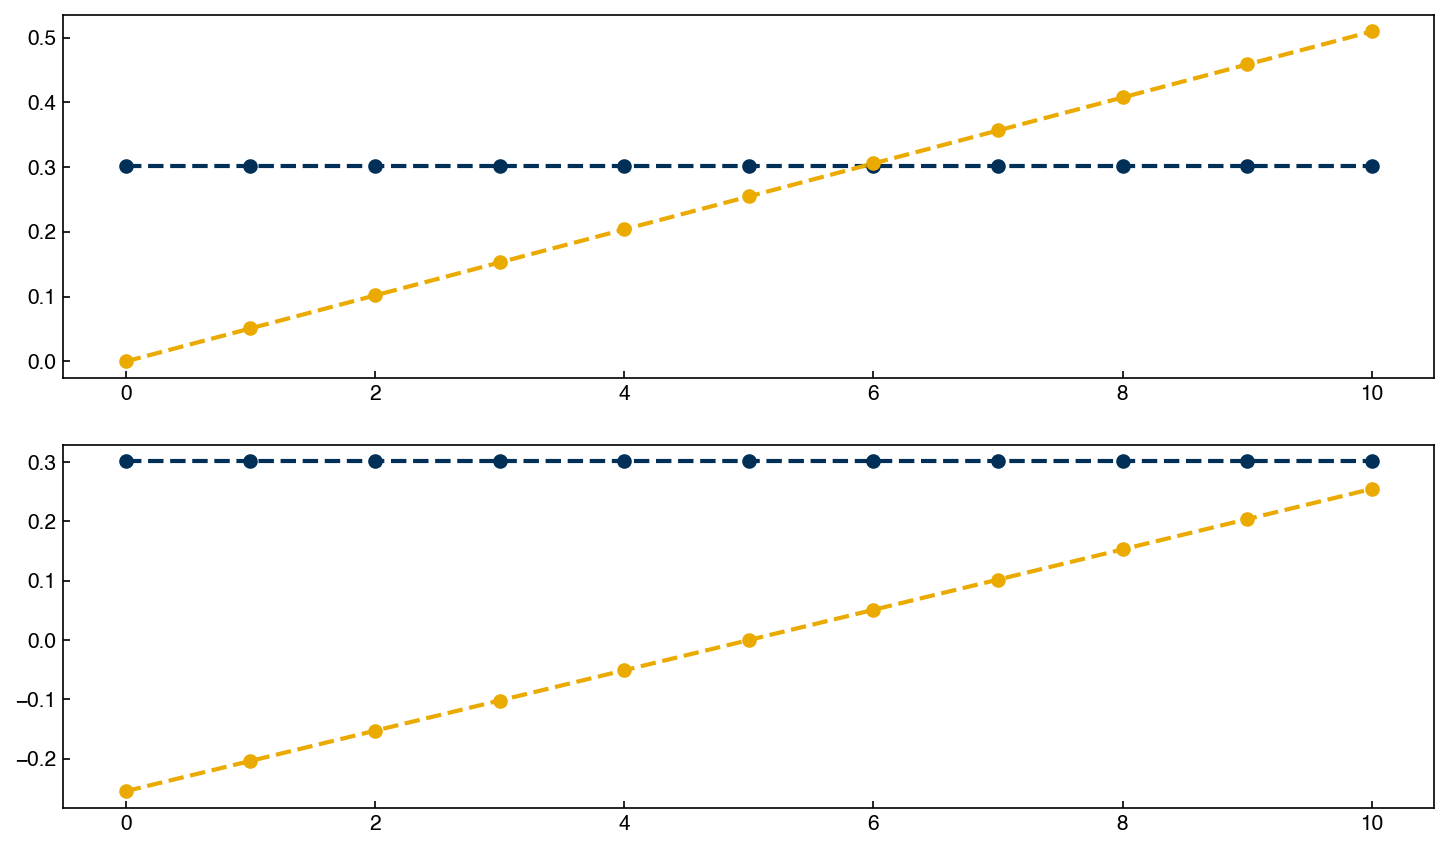

In [18]:
fig, axes = plt.subplots(2,1, figsize=(10,6))

axes[0].plot(xi, col_0_normed, '--o')
axes[0].plot(xi, col_1_normed, '--o')

axes[1].plot(xi, col_0_normed, '--o')
axes[1].plot(xi, col_1_ortho, '--o');

---

### Demonstration: Create an orthonormal version of the Vandermonde matrix (Gram-Schmidt)

We can perform Gram-Schmidt orthonormalization on the first two columns of the Vandermonde matrix:

In [19]:
x = np.linspace(0, 5, 6)
vdm = np.hstack((x[:, None]**0, x[:, None]**1, x[:, None]**2))

# Orthonormalizing the 1st column
ortho_1 = vdm[:, 0] / np.linalg.norm(vdm[:, 0], ord=2)

# Orthonormalizing the 2nd column relative to the 1st
proj = np.dot(ortho_1, vdm[:, 1]) * ortho_1
ortho_2 = vdm[:, 1] - proj
ortho_2 = ortho_2 / np.linalg.norm(ortho_2)

print(np.dot(ortho_1, ortho_2))  # should be ~0

-5.273559366969494e-16


This confirms that the two orthonormal vectors are perpendicular.

---

~~~{admonition} Exercise
:class: tip

Use a `for` loop to perform Gram-Schmidt orthonormalization on the first **three columns** of a Vandermonde matrix.

Start with this matrix:

```python
x = np.linspace(0, 5, 6).reshape(-1, 1)
vdm = np.hstack((x**0, x**1, x**2))
```

Your loop should:
- Normalize the first column
- Subtract off the projection of each subsequent column onto all previously normalized vectors
- Normalize the result at each step

Use `np.dot()` and `np.linalg.norm()` as needed. Check that the resulting vectors are orthogonal by computing their pairwise dot products.
~~~


## Rank, Inverses, and Linear Systems

Before we dive into rank and matrix inverses, it’s helpful to recall the connection between **systems of equations** and **matrix-vector notation**.

Consider this system of equations:

$$
\begin{align*}
2x + y &= 5 \\
3x - y &= 4
\end{align*}
$$

We can rewrite this in matrix-vector form:

$$
\begin{bmatrix}
2 & 1 \\
3 & -1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
5 \\
4
\end{bmatrix}
$$

Or more compactly as:

$$
\bar{\bar{A}} \vec{x} = \vec{b}
$$

This form lets us use tools from linear algebra to solve the system, analyze its properties, or even approximate solutions when exact ones don’t exist.

---

The concept of the **rank** of a matrix is fundamental. Formally, the rank is the number of **linearly independent columns or rows**.

For an $m \times n$ matrix, the rank is always less than or equal to the minimum of $m$ and $n$:

$$
\text{rank} \leq \min(m, n)
$$

---

It’s helpful to connect this with the matrix-vector equation:

$$
\bar{\bar{A}}\vec{x} = \vec{b}
$$

- If $m = n$ and $\bar{\bar{A}}$ has **full rank**, the system has a **unique solution**.
- If $m > n$, the system is **overconstrained** — there are more equations than unknowns.
- If $m < n$, the system is **underdetermined** — more unknowns than equations.

A matrix is **invertible** if and only if it is **square and full-rank**. That means all rows (and columns) are linearly independent.

---

Let’s look at a concrete example using the Vandermonde matrix:

In [20]:
A = X_vdm[1:4, :]
b = yi[1:4]

print('Shape of A: {}'.format(A.shape))
print('Rank of A: {}'.format(np.linalg.matrix_rank(A)))

A_inv = np.linalg.inv(A)
w = A_inv @ b

print('Weights: {}'.format(w))

Shape of A: (3, 3)
Rank of A: 3
Weights: [ 1.5  0.8 -0.2]


---

### Demonstration: What happens if we add redundant rows?

Let’s check how the rank changes when we add a redundant equation.

In [21]:
B = np.array([[0, 1], [2, 3]])
print(np.linalg.matrix_rank(B))  # should be 2

# Add a third, redundant row
C = np.array([[0, 1], [2, 3], [2, 4]])
print(np.linalg.matrix_rank(C))  # still 2

2
2


The third row does not provide new information, so the rank remains 2.

---

In practice, solving systems of equations using matrix inverses (`np.linalg.inv`) is inefficient and numerically unstable. Instead, we use built-in solvers like:

In [22]:
w_solve = np.linalg.solve(A, b)
np.isclose(w_solve, w).all()

np.True_

This is the preferred approach in both practice and in this course. It only works when:
1. You can write the system as $\bar{\bar{A}}\vec{x} = \vec{b}$  
2. The matrix $\bar{\bar{A}}$ is square and full-rank

---

~~~{admonition} Exercise
:class: tip

Given the matrix:

```python
A = np.array([[2, 1], [4, 2]])
b = np.array([3, 6])
```

1. Use `np.linalg.matrix_rank(A)` to determine whether the matrix is full rank.
2. Try solving the system using `np.linalg.solve(A, b)` — what happens?
3. Now modify `A` so that it becomes full rank. Solve the system again.

This exercise will help you build intuition for how rank affects solvability.
~~~


## Eigen and Singular Value Decompositions

One powerful tool in linear algebra is the **eigenvalue decomposition**, or eigendecomposition, which expresses a square matrix in terms of its eigenvalues and eigenvectors.

For a matrix $\bar{\bar{A}}$, an eigenvalue problem looks like:

$$
\bar{\bar{A}} \vec{v}_n = \lambda_n \vec{v}_n
$$

where $\vec{v}_n$ is an **eigenvector**, and $\lambda_n$ is the corresponding **eigenvalue**.

This means that when $\bar{\bar{A}}$ acts on $\vec{v}_n$, the result is just a scaled version of $\vec{v}_n$ — not rotated or altered in direction.

To compute eigenvalues in Python:

In [23]:
from numpy.linalg import eigvals, eig

print('Eigenvalues of A: {}'.format(eigvals(A)))

Eigenvalues of A: [10.60311024  1.24543789  0.15145187]


To get both eigenvalues and eigenvectors:

In [24]:
vals, vecs = eig(A)
print('Eigenvectors of A: {}'.format(vecs))

np.isclose(vals, eigvals(A))  # should be True

Eigenvectors of A: [[-0.13772903 -0.81480675  0.65820453]
 [-0.43070617 -0.49754289 -0.7324674 ]
 [-0.89192091  0.29755844  0.17394918]]


array([ True,  True,  True])

```{note}
If a matrix is **not symmetric**, its eigenvalues and eigenvectors may be **complex**.  
In this context, “complex” means they may include **imaginary numbers**, such as $1 + 2i$.

This is not a numerical error — it reflects the fact that real, non-symmetric transformations can involve rotation and scaling in ways that cannot be captured by real numbers alone.

Symmetric matrices always have **real** eigenvalues and orthogonal eigenvectors, which is one reason they’re so widely used.
```

---

If the matrix is **symmetric**, then the eigenvectors will always be **orthonormal**. Let’s construct a symmetric matrix and check:

In [25]:
A_sym = (A.T + A)/2.  # make A symmetric
vals, vecs = eig(A_sym)

vec0 = vecs[:, 0]
vec1 = vecs[:, 1]
vec2 = vecs[:, 2]

np.isclose(vec0 @ vec1, 0)

np.True_

This confirms that the eigenvectors are orthogonal.

---

Eigendecomposition only works for square matrices, but there is a more general tool called **singular value decomposition**, or SVD, which applies to **any** matrix:

$$
\bar{\bar{A}} = \hat{U} \hat{\Sigma} \hat{V}^T
$$

where:
- $\hat{U}$ contains the **left singular vectors**
- $\hat{V}$ contains the **right singular vectors**
- $\hat{\Sigma}$ is a diagonal matrix of **singular values**

The **singular value decomposition (SVD)** is closely related to eigendecomposition — in fact, for a square **symmetric** matrix:

$$
\bar{\bar{A}} = \hat{U} \hat{\Sigma} \hat{U}^T
$$

This is mathematically equivalent to the eigendecomposition:

$$
\bar{\bar{A}} = \bar{\bar{V}} \bar{\bar{\Lambda}} \bar{\bar{V}}^T
$$

In [26]:
from numpy.linalg import svd

vecsL, vals, vecsR = svd(A_sym)
np.isclose(vecsR[2, :], vecs[:, 2])  # should be close

array([ True,  True,  True])

Even when the matrix is not square, the SVD still works:

In [27]:
vecsL, vals, vecsR = svd(X_vdm)

print('Original matrix shape: {}'.format(X_vdm.shape))
print('Left singular vectors shape: {}'.format(vecsL.shape))
print('Right singular vectors shape: {}'.format(vecsR.shape))
print('Singular Values: {}'.format(vals))

Original matrix shape: (11, 3)
Left singular vectors shape: (11, 11)
Right singular vectors shape: (3, 3)
Singular Values: [160.3135455    5.20337928   1.22146387]


The number of singular values equals the rank of the matrix, and they provide useful information about the structure of the data.

Here’s what distinguishes the SVD from the eigendecomposition:

- **Eigendecomposition** only applies to **square** matrices.
- **SVD** applies to **any** matrix, even rectangular ones.
- The eigenvalues of $\bar{\bar{A}}^T \bar{\bar{A}}$ (or $\bar{\bar{A}} \bar{\bar{A}}^T$) correspond to the **squares** of the singular values in the SVD.
- SVD always yields **real, non-negative singular values**, even for non-symmetric matrices.

In short: **SVD is more general**, and often more numerically stable, but conceptually similar. Many machine learning algorithms rely on it under the hood. 

For more details, see Lecture 4 of Trefethen & Bau.

---


### Rank, eigenvalues, and condition number

We’ve seen how the **rank** of a matrix determines whether a system can be solved uniquely. But what if the matrix is **almost** rank-deficient?

That is, the matrix is full-rank numerically, but one of its singular values is very close to zero. In these cases, the matrix is **ill-conditioned**, and small changes in input can produce large errors in the result.

We can detect this using the **condition number**:

$$
\text{cond}(\bar{\bar{A}}) = \frac{\sigma_{\max}}{\sigma_{\min}}
$$

where $\sigma_{\max}$ and $\sigma_{\min}$ are the largest and smallest singular values, respectively.

A large condition number indicates an unstable system. A condition number of $10^3$ is mildly ill-conditioned; $10^8$ or higher is seriously problematic.

Let’s compute it:

In [28]:
from numpy.linalg import cond

A = np.array([[1, 1], [1, 1.00001]])
print('Condition number: {:.2e}'.format(cond(A)))

Condition number: 4.00e+05


This matrix is nearly singular — it has two nearly linearly dependent rows (i.e. if 1.00001 was rounded to 1, the two rows would be exactly the same). Let’s see what happens when we try to invert it:

In [29]:
np.linalg.inv(A)

array([[100000.99999934, -99999.99999934],
       [-99999.99999934,  99999.99999934]])

You may get an answer, but it is likely to be numerically unreliable.

~~~{admonition} Exercise
:class: tip

Let

```python
A = np.array([[5, 10], [10.00001, 5]])
```

1. Compute the eigenvalues using `np.linalg.eigvals`.
2. Based on their values, what is the rank of `A`?
3. Estimate the condition number by dividing the larger eigenvalue by the smaller one.
4. Now repeat with:

```python
A = np.array([[5, 5], [10, 10.00001]])
```

What changes? What does this tell you about the numerical stability of solving $\bar{\bar{A}}\vec{x} = \vec{b}$?

Note: For symmetric matrices, the ratio of eigenvalues approximates the condition number.
~~~


## Additional Reading

- Trefethen & Bau, *Numerical Linear Algebra* (Lectures 2–4)
- [Machine Learning Refined: Linear Algebra](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/notes/16_Linear_algebra)
- [CS229 Notes: Linear Algebra Review](https://cs229.stanford.edu/section/cs229-linalg.pdf)
- Strang, *Introduction to Linear Algebra*